<a href="https://colab.research.google.com/github/Anabel-l/ShakespeareClassifier/blob/main/Class_Shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import json
import sys
import collections
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
startTime = datetime.now()


verbose = False


#setup book model
# this is takes in the training data per each file (each "Book")
class Book():
  def __init__(self, book_title):
    self.trigrams = collections.defaultdict(lambda: 0)
    self.words = collections.defaultdict(lambda: 0)
    self.book_title = book_title

  def process(self):
    #open file
    if os.path.isfile('drive/MyDrive/Computational Linguistics/'+self.book_title):
        print('Processing file', self.book_title)
        with open('drive/MyDrive/Computational Linguistics/'+self.book_title, 'r') as f0:
            sentence_buffer = []
            for i, line in enumerate(f0.readlines()):
                if i % 100 == 0:
                    if verbose: print('Processed', i, 'lines.')

                #take away all punctuation
                line = line.rstrip()
                if len(line) < 1:
                    continue

                #if it's a play, this part strips away stage instructions
                if line[0] == '[':
                    continue
                line = re.sub(r'([\.,;:!\?”"])', r'', line)
                line = re.sub(r'(“)', r'', line)
                line = re.sub(r'[_‘]', '', line)
                line = re.sub('—', ' ', line)
                line = re.sub('-', ' ', line)

                #ok now we split into words
                lal = line.split()

                #at any given word we will have 3 trigrams running,
                #since each word will be in 3 trigrams, at indices 0, 1, 2
                trigram1 = ""
                count = 0
                trigram2 = ""
                trigram3 = ""
                for i, wd in enumerate(lal):
                  if wd in ['.', '!', '?', ':', ';', ','] or wd[0].isupper() or wd[0] in ['[',']','-']:
                      continue
                  #we also use words, so that this takes total vocabulary as
                  #well as trigram patterns into account (higher accuracy predictions)
                  self.words[wd] += 1

                  #this sort of functions like a state machine, it starts in state 0,
                  #moves to the next state at the next word, and continues to cycle
                  if (count == 0):
                    #ok so this is starts off the first trigam
                    trigram1 = wd

                    #if trigram2 isn't empty, add this word to the last place and
                    #add it to the list of trigrams
                    if trigram2:
                      trigram2 += '_' + wd
                      self.trigrams[trigram2] += 1
                    #if trigram3 isn't empty, add this word to it
                    if trigram3:
                      trigram3 += '_' + wd
                    count += 1

                  #repeat this process for each of the states!
                  elif(count == 1):
                    if trigram1:
                      trigram1 += '_' + wd
                    trigram2 = wd
                    if trigram3:
                      trigram3 += '_' + wd
                      self.trigrams[trigram3] += 1
                    count +=1
                  elif(count == 2):
                    if trigram1:
                      trigram1 += '_' + wd
                      self.trigrams[trigram1] += 1
                    if trigram2:
                      trigram2 += '_' + wd
                    trigram3 = wd
                    count = 0
    else:
        print('No file found with  name', self.book_title)
        exit()

  def compute(self):
    #so once we've processed all the data, we can calculate the percentages of
    #each trigram and word for the "book"
    total_words = len(self.words)
    print('There are', total_words, 'words in', book_title)
    total_trigrams = len(self.trigrams)
    print('There are', total_trigrams, 'trigrams in', book_title)
    for trigram in list(self.trigrams):
        if verbose: print(trigram, self.trigrams[trigram])
        self.trigrams[trigram] = self.trigrams[trigram] / total_trigrams
    for wd in list(self.words):
        if verbose: print(wd, self.words[wd])
        self.words[wd] = self.words[wd] / total_words

  def plot_words(self):
    #sort dictionary by keys so most frequent words show up first
    keys = list(self.words.keys())
    values = list(self.words.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

    #select the first 10 most frequent to see
    wds = list(sorted_dict.keys())[-10:]
    values = list(sorted_dict.values())[-10:]

    fig = plt.figure(figsize = (8, 4))
    plt.xticks(rotation=80)

    # creating the bar plot
    plt.bar(wds, values, color ='maroon',
            width = 0.1)

    plt.xlabel("Words in model")
    plt.ylabel("Percentage of words")
    plt.title("Sample Frequency Words in " + self.book_title)
    plt.show()

  def plot_trigrams(self):
    #sort dictionary by keys so most frequent trigrams show up first
    keys = list(self.trigrams.keys())
    values = list(self.trigrams.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

    #select the first 10 most frequent to see
    wds = list(sorted_dict.keys())[-10:]
    values = list(sorted_dict.values())[-10:]

    fig = plt.figure(figsize = (8, 4))
    plt.xticks(rotation=80)
    # creating the bar plot
    plt.bar(wds, values, color ='blue',
            width = 0.1)


    plt.xlabel("Trigrams in model")
    plt.ylabel("Percentage of trigrams")
    plt.title("Sample Frequency Trigrams in " + self.book_title)
    plt.show()



Processing file play_train.txt
There are 3672 words in play_train.txt
There are 13417 trigrams in play_train.txt


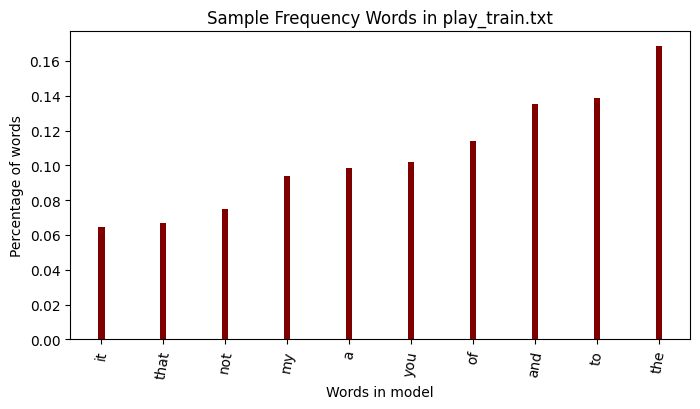

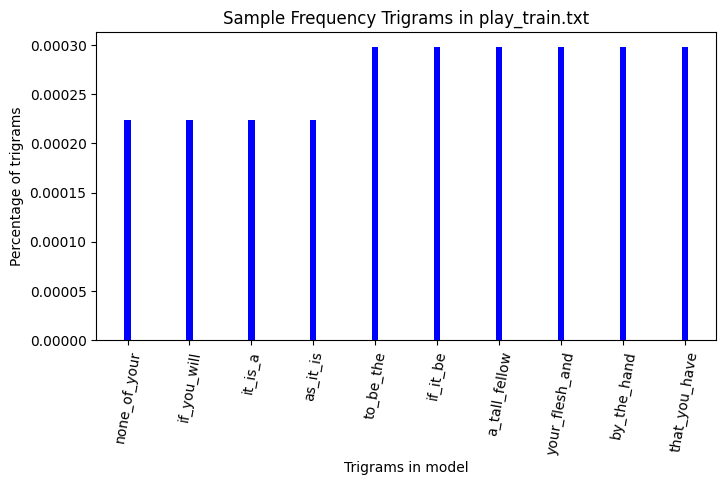

words json file created
trigrams json file created
Processing file shakespeares_sonnets.txt
There are 1569 words in shakespeares_sonnets.txt
There are 3478 trigrams in shakespeares_sonnets.txt


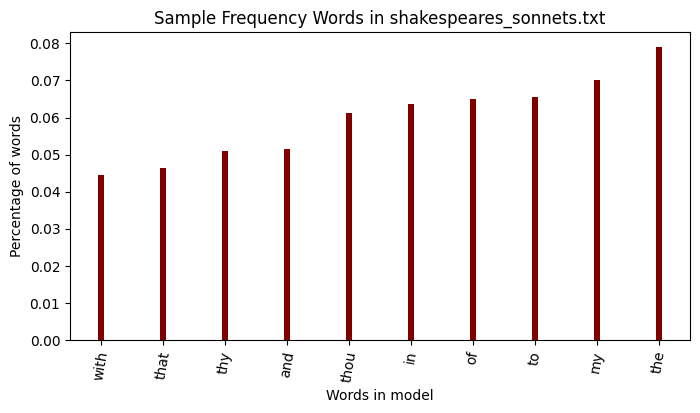

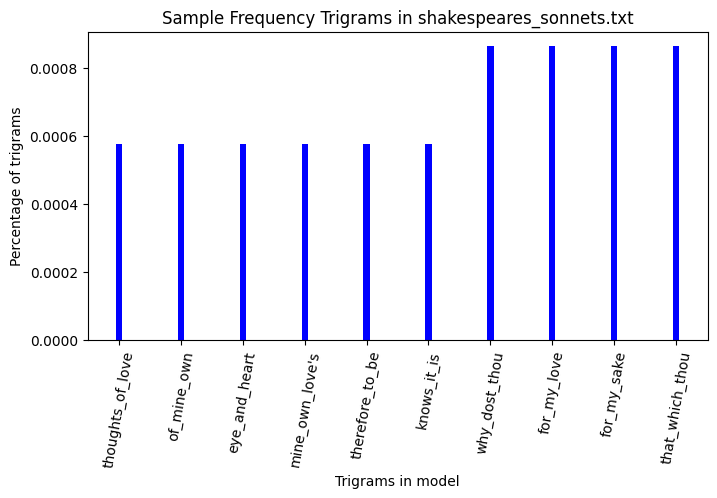

words json file created
trigrams json file created


In [ ]:
#ok now we take in the training data, we have a selection of shakespearean sonnets and play
book_titles = ['play_train.txt', 'shakespeares_sonnets.txt']

for book_title in book_titles:
    model = Book(book_title)
    model.process()
    model.compute()
    model.plot_words()
    model.plot_trigrams()


    with open('drive/MyDrive/Computational Linguistics/'+book_title+'_words.json', 'w') as f1:
        json.dump(model.words, f1)
        print('words json file created')

    with open('drive/MyDrive/Computational Linguistics/'+book_title+'_words.json', 'w') as f2:
        json.dump(model.trigrams, f2)
        print('trigrams json file created')




In [ ]:
import re
import json
import sys
import collections
import os
import json
import math
from datetime import datetime
startTime = datetime.now()
path = 'drive/MyDrive/Computational Linguistics/'

train1 = 'play_train.txt'
train2 = 'shakespeares_sonnets.txt'

with open(path+train1+'_trigrams.json', 'r') as f1:
    trigram_dict1 = json.load(f1)

with open(path+train2+'_trigrams.json', 'r') as f2:
    trigram_dict2 = json.load(f2)

with open(path+train1+'_words.json', 'r') as f1:
    word_dict1 = json.load(f1)

with open(path+train2+'_words.json', 'r') as f2:
    word_dict2 = json.load(f2)

print('Files opened')

#find commonalities in the training data

trigrams_in_both_dictionaries = [b for b in list(trigram_dict1) if b in list(trigram_dict2)]
words_in_both_dictionaries = [b for b in list(word_dict1) if b in list(word_dict2)]

Files opened


In [ ]:
#this is our class for processing test data & creating a test model per each file

class Test():
  def __init__(self, test_file_title):
    self.trigrams_tested1 = 1
    self.trigrams_tested2 = 1
    self.words_tested1 = 1
    self.words_tested2 = 1
    self.log_prob1 = 0
    self.log_prob2 = 0
    self.neither_ratio = 0.52
    self.test_file = test_file_title

  def process(self):
    #open files
    print('Processing file', self.test_file)
    with open(path+self.test_file, 'r') as f0:
        sentence_buffer = []

        for i, line in enumerate(f0.readlines()):
                if i % 100 == 0:
                    if verbose: print('Processed', i, 'lines.')
                line = line.rstrip()
                if len(line) < 1:
                    continue
                if line[0] == '[':
                    continue
                line = re.sub(r'([\.,;:!\?”"])', r'', line)
                line = re.sub(r'(“)', r'', line)
                line = re.sub(r'[_‘]', '', line)
                line = re.sub('—', ' ', line)
                line = re.sub('-', ' ', line)
                #line = re.sub(r'[^a-zA-Z\.’ ]', '', line)
                #print(line)
                lal = line.split()
                trigram1 = ""
                count = 0
                trigram2 = ""
                trigram3 = ""

                #pretty much the same process as the book (training) model but instead
                # of just adding the words & trigrams to a list we also test the log
                #probability
                for i, wd in enumerate(lal):
                  if wd in ['.', '!', '?', ':', ';', ','] or wd[0].isupper() or wd[0] in ['[',']','-']:
                      continue

                  #words here
                  if wd in words_in_both_dictionaries:
                      self.log_prob1 += math.log(word_dict1[wd])
                      self.words_tested1 += 1
                      self.log_prob2 += math.log(word_dict2[wd])
                      self.words_tested2 += 1

                  #trigrams here
                  if (count == 0):
                    trigram1 = wd
                    if trigram2:
                      trigram2 += '_' + wd
                      if trigram2 in trigrams_in_both_dictionaries:
                          self.log_prob1 += math.log(trigram_dict1[trigram2])
                          self.trigrams_tested1 += 1
                          self.log_prob2 += math.log(trigram_dict2[trigram2])
                          self.trigrams_tested2 += 1
                    if trigram3:
                      trigram3 += '_' + wd
                    count += 1
                  elif(count == 1):
                    if trigram1:
                      trigram1 += '_' + wd
                    trigram2 = wd
                    if trigram3:
                      trigram3 += '_' + wd
                      if trigram3 in trigrams_in_both_dictionaries:
                          self.log_prob1 += math.log(trigram_dict1[trigram3])
                          self.trigrams_tested1 += 1
                          self.log_prob2 += math.log(trigram_dict2[trigram3])
                          self.trigrams_tested2 += 1
                    count +=1
                  elif(count == 2):
                    if trigram1:
                      trigram1 += '_' + wd
                      if trigram1 in trigrams_in_both_dictionaries:
                          self.log_prob1 += math.log(trigram_dict1[trigram1])
                          self.trigrams_tested1 += 1
                          self.log_prob2 += math.log(trigram_dict2[trigram1])
                          self.trigrams_tested2 += 1
                    if trigram2:
                      trigram2 += '_' + wd
                    trigram3 = wd
                    count = 0
                buffer_empty = False
                if wd in ['.', '!', '?', ':', ';']:
                    buffer_empty = True


  def print_results(self):
    play_model_log = self.log_prob1 / (self.trigrams_tested1 + self.words_tested1)
    sonnet_model_log = self.log_prob2 / (self.trigrams_tested2 + self.words_tested2)
    combined_log = play_model_log + sonnet_model_log

    #plot the values for visibility
    labels = ["play log", "sonnet log", "ratio"]
    values = [play_model_log / combined_log, sonnet_model_log / combined_log, play_model_log / sonnet_model_log]
    fig = plt.figure(figsize = (8, 4))
    plt.bar(labels, values, color ='maroon', width = 0.4)
    plt.axhline(y=self.neither_ratio, color='r', linestyle='-')
    plt.xlabel("Probabilities")
    plt.ylabel("Values")
    plt.title("Log prediction for "+self.test_file)
    plt.show()

    #display numbers
    print('Average log prob adjusted for total log prob for file', self.test_file, 'on play-based model =', play_model_log / combined_log)
    print('Average log prob adjusted for total log prob for file', self.test_file, 'on sonnet-based model =', sonnet_model_log / combined_log)
    ratio = play_model_log / sonnet_model_log
    print('Ratio:', ratio)

    # this did end up being biased towards the play-based model, so we account for it by finding
    # the ratio between the two models and comparing it to a ratio we found for a neutral option
    if(ratio - self.neither_ratio < 0):
      print('Predicted to be play')
    else:
      print('Predicted to be sonnet collection')
    print()





Processing file spenser_sonnets.txt


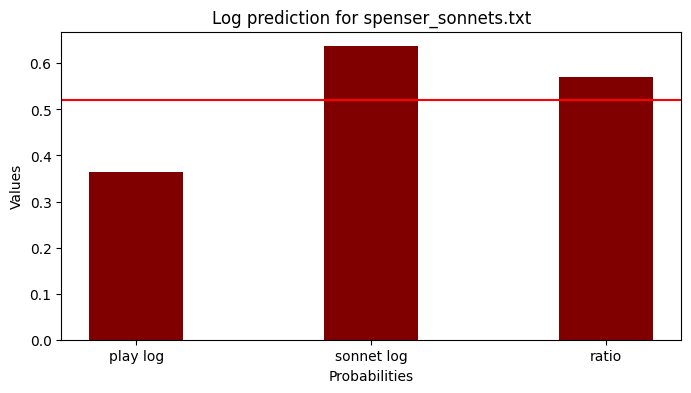

Average log prob adjusted for total log prob for file spenser_sonnets.txt on play-based model = 0.3632127264197813
Average log prob adjusted for total log prob for file spenser_sonnets.txt on sonnet-based model = 0.6367872735802188
Ratio: 0.5703831428314904
Predicted to be sonnet collection

Processing file faustus.txt


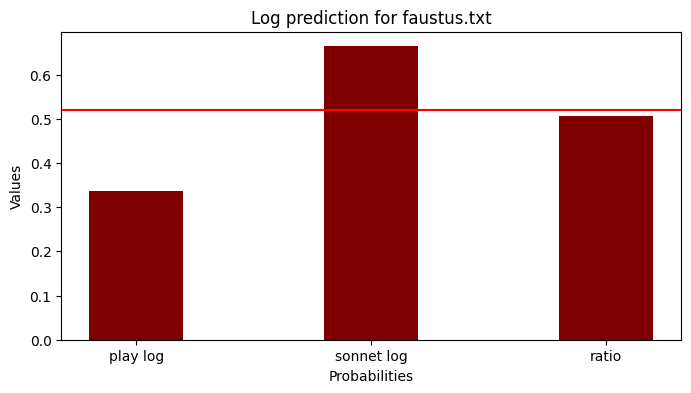

Average log prob adjusted for total log prob for file faustus.txt on play-based model = 0.33593630909935446
Average log prob adjusted for total log prob for file faustus.txt on sonnet-based model = 0.6640636909006457
Ratio: 0.5058796523624657
Predicted to be play

Processing file romeo_and_juliet.txt


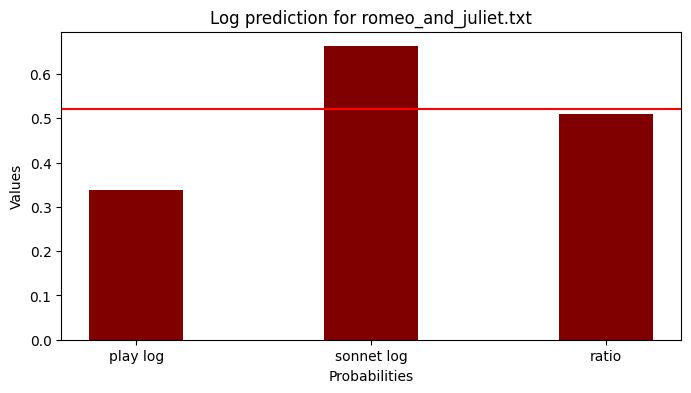

Average log prob adjusted for total log prob for file romeo_and_juliet.txt on play-based model = 0.33778165582570185
Average log prob adjusted for total log prob for file romeo_and_juliet.txt on sonnet-based model = 0.6622183441742981
Ratio: 0.510075957268856
Predicted to be play

Processing file the_tempest.txt


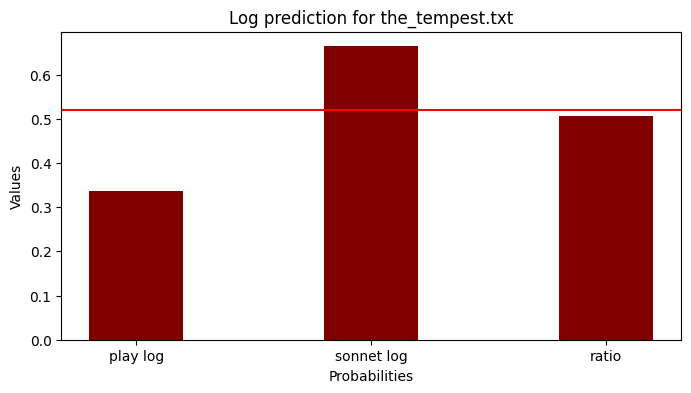

Average log prob adjusted for total log prob for file the_tempest.txt on play-based model = 0.3359816974481846
Average log prob adjusted for total log prob for file the_tempest.txt on sonnet-based model = 0.6640183025518154
Ratio: 0.5059825853549675
Predicted to be play

Processing file test_sonnets.txt


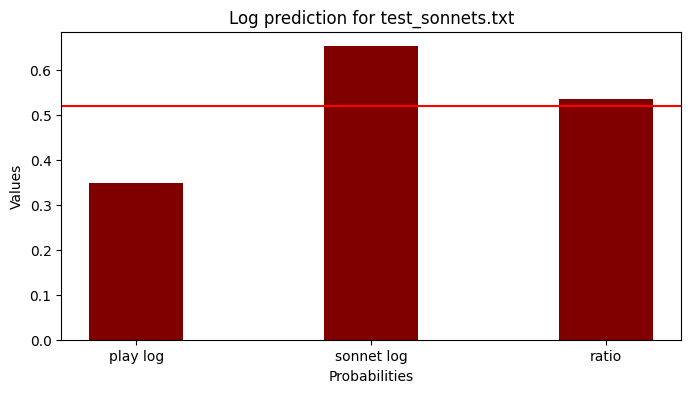

Average log prob adjusted for total log prob for file test_sonnets.txt on play-based model = 0.34816217706895786
Average log prob adjusted for total log prob for file test_sonnets.txt on sonnet-based model = 0.6518378229310422
Ratio: 0.5341239259535724
Predicted to be sonnet collection

Processing file little_women.txt


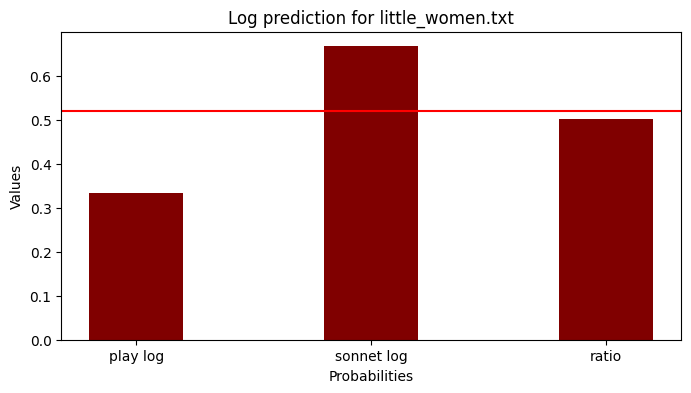

Average log prob adjusted for total log prob for file little_women.txt on play-based model = 0.3337681486548407
Average log prob adjusted for total log prob for file little_women.txt on sonnet-based model = 0.6662318513451593
Ratio: 0.5009789729820695
Predicted to be play

0:06:07.248654


In [ ]:

# to see how this generalizes, we added some non-shakespearean pieces from the same time period.
# for instance: Spenser's sonnets and Marlowe's The Tragical History of Doctor Faustus
titles = ['spenser_sonnets.txt','faustus.txt', 'romeo_and_juliet.txt', 'the_tempest.txt', 'test_sonnets.txt', 'little_women.txt']
# Cool thing about this! It actually predicts the Spenser sonnets to be sonnets and the Marlowe
# piece to be a play, despite the fact it only trained on Shakespearean writing
# so there are distinguishing features to an Elizabethean sonnet


for test_file in titles:
    t = Test(test_file)

    t.process()
    t.print_results()

print(datetime.now() - startTime)